## Diabetes Dataset

1. Decision Trees

2. Random Forest

3. Logistic Regression

4. Bagging Model

5. Adaboost

6. Gradient Boosting Model

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv(".//Downloads//diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

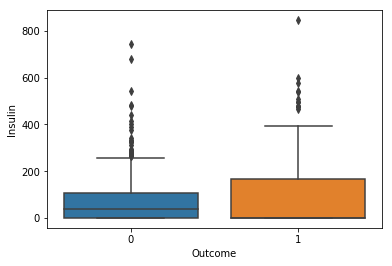

In [5]:
# Create a Plot of Insulin and Outcome
sns.boxplot(x = diabetes["Outcome"], y = diabetes["Insulin"])

In [6]:
diabetes[diabetes["Insulin"]>800]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1


In [7]:
# People who have high insulin, arey they having high BMI?
diabetes[diabetes["Insulin"]>140]["BMI"].describe()

count    164.000000
mean      34.923171
std        6.246684
min       19.600000
25%       30.775000
50%       34.500000
75%       38.475000
max       57.300000
Name: BMI, dtype: float64

In [8]:
diabetes[diabetes["BMI"]>25]["Outcome"].value_counts()

0    386
1    259
Name: Outcome, dtype: int64

In [9]:
# People who have High BP would be diabetic
diabetes["BloodPressure"].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [10]:
# if BMI is > 24, what is the statistical summary of BP
diabetes[diabetes["BMI"]>24]["BloodPressure"].describe()

count    679.000000
mean      70.287187
std       17.783564
min        0.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      114.000000
Name: BloodPressure, dtype: float64

In [11]:
# Imputting 75  as median where the BP is 0
diabetes["BloodPressure"].replace(to_replace = 0, 
                                  value = 72, inplace=True)

In [12]:
diabetes[diabetes["BloodPressure"]<50]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
18,1,103,30,38,83,43.3,0.183,33,0
75,1,0,48,20,0,24.7,0.140,22,0
80,3,113,44,13,0,22.4,0.140,22,0
97,1,71,48,18,76,20.4,0.323,22,0
117,5,78,48,0,0,33.7,0.654,25,0
125,1,88,30,42,99,55.0,0.496,26,1
293,1,128,48,45,194,40.5,0.613,24,1
346,1,139,46,19,83,28.7,0.654,22,0
405,2,123,48,32,165,42.1,0.520,26,0


Drivers of Being Diabetic

1. BMI and BMI with levels greater than 25

2. People with High Insulin are Diabetic

3. Blood Pressure levels are impacting the Diabetic Elements in a Human

4. Very Less Impact of Pregnancy seen on Being Diabetic


In [13]:
# Skin Thickness
diabetes.SkinThickness.describe() # Correct Range is 20-26

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [14]:
diabetes[diabetes.SkinThickness==99]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [15]:
diabetes.SkinThickness.replace(to_replace=0, value = 23, inplace=True)

In [16]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [17]:
diabetes[diabetes["Insulin"]==0]["Outcome"].value_counts()

0    236
1    138
Name: Outcome, dtype: int64

In [18]:
# Imputting the Median Value for Glucose
diabetes["Glucose"].replace(to_replace = 0, value = 117, inplace=True)

In [19]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,23,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
# Impute the BMI Values
diabetes[diabetes.BMI==0]["Outcome"].value_counts()

0    9
1    2
Name: Outcome, dtype: int64

In [21]:
# BMI of those people where the Outcome is 0
diabetes[diabetes.Outcome==0]["BMI"].describe()

count    500.000000
mean      30.304200
std        7.689855
min        0.000000
25%       25.400000
50%       30.050000
75%       35.300000
max       57.300000
Name: BMI, dtype: float64

In [22]:
diabetes["BMI"].replace(to_replace = 0, value = 30, inplace = True)

In [23]:
# Feature Extraction
diabetes["BMI"].describe()

count    768.000000
mean      32.422266
std        6.881357
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

## Feature Engineering

Extracted a new variable called BMI CAT that has the cat values for BMI Ranges

In [24]:
# 18-24:: Healthy, 25-30:Overweight >30: OBESE...
def obese_cat(x):
    if(x<=18) and (x<=24):
        return 0
    elif(x>24) and (x<=30):
        return 1
    else:
        return 2

In [25]:
diabetes["BMICat"] = diabetes["BMI"].apply(obese_cat)

In [26]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMICat
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,23,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,2


In [27]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMICat                      0
dtype: int64

### Process henceforth...

1. Split the Data Into Train and Test

2. Scale the Dataset

3. Start Building the Models

In [28]:
# Define the X and Ys...
x = diabetes.drop("Outcome", axis = 1)
y = diabetes["Outcome"]

In [29]:
# Importing the Split Data Library
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, 
                                test_size = 0.30, random_state = 123)

In [30]:
# Feature Scaling of the Xtrain and Xtest
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [31]:
sc.fit(xtrain) # Found the Metrics:: Mean and SD

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
# Tuning the Train Dataset...
xtrain = pd.DataFrame(sc.fit_transform(xtrain), 
                      columns=xtrain.columns)

In [33]:
# Used the Metrics Found to Tune the Dataset
xtest = pd.DataFrame(sc.transform(xtest), 
                     columns=xtest.columns) 

In [34]:
# Importing the Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
# Logistics Regression Model
lg = LogisticRegression()
model_lg = lg.fit(xtrain,ytrain).predict(xtest)

In [36]:
# Checking the Accuracy Score
accuracy_score(ytest, model_lg)

0.7922077922077922

In [37]:
print(classification_report(ytest, model_lg))

             precision    recall  f1-score   support

          0       0.80      0.89      0.84       143
          1       0.78      0.64      0.70        88

avg / total       0.79      0.79      0.79       231



In [38]:
# Decision Tree Model
dtree = DecisionTreeClassifier(criterion="entropy")
model_dtree = dtree.fit(xtrain, ytrain).predict(xtest)

In [39]:
# Checking the Accuracy Score
accuracy_score(ytest, model_dtree)

0.7316017316017316

In [40]:
print(classification_report(ytest, model_dtree))

             precision    recall  f1-score   support

          0       0.82      0.72      0.77       143
          1       0.62      0.75      0.68        88

avg / total       0.75      0.73      0.74       231



In [41]:
# Random Forest
rf = RandomForestClassifier(criterion="entropy",oob_score=True)
model_rf = rf.fit(xtrain, ytrain).predict(xtest)

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [42]:
# Check Accuracy
accuracy_score(ytest, model_rf)

0.7402597402597403

# Ensemble of these Three Models Created

In Classification problems, we use Voting Classifier to Ensemble the Models.

My models have names of lg, rf and dtree

In [43]:
# Bagging Model
bagg = BaggingClassifier(oob_score=True)
model_bagg = bagg.fit(xtrain,ytrain).predict(xtest)

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [44]:
# Accuracy of Bagged Model
accuracy_score(ytest, model_bagg)

0.7532467532467533

In [66]:
# Adaboost
ada = AdaBoostClassifier(base_estimator=rf, n_estimators=150)
model_ada = ada.fit(xtrain,ytrain).predict(xtest)

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some in

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: inva

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: inva

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: inva

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: inva

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: inva

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some in

In [67]:
accuracy_score(ytest, model_ada)

0.7619047619047619

In [68]:
vc = VotingClassifier(estimators=[("Decision Tree", dtree),("Random Forest", rf),
                                  ("Bagging", bagg),("Ada Boost", ada)])

In [69]:
model_vc = vc.fit(xtrain,ytrain).predict(xtest)

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Som

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some in

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: inva

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some in

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some in

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some in

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: inva

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [70]:
accuracy_score(ytest,model_vc)

0.7359307359307359

In [51]:
print(classification_report(ytest, model_vc))

             precision    recall  f1-score   support

          0       0.76      0.84      0.80       143
          1       0.69      0.58      0.63        88

avg / total       0.74      0.74      0.74       231



In [62]:
# Gradient Boosting
gbm = GradientBoostingClassifier()
model_gbm = gbm.fit(xtrain, ytrain).predict(xtest)

In [63]:
accuracy_score(ytest, model_gbm)

0.8008658008658008

In [72]:
vc = VotingClassifier(estimators={("Bagging", bagg), ("GBM", gbm)})

In [73]:
model_newvc = vc.fit(xtrain, ytrain).predict(xtest)

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [74]:
accuracy_score(ytest, model_newvc)

0.7705627705627706

In [80]:
# Checking if XGBOOST is imported Correct
import xgboost as xgb

In [88]:
xg = xgb.XGBClassifier(n_estimators=150, learning_rate=1.0, max_depth=6)

In [89]:
model_xg = xg.fit(xtrain, ytrain).predict(xtest)

C:\Users\classroom2-DTP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [90]:
accuracy_score(ytest, model_xg)

0.7489177489177489

In [91]:
xg_params={"eta":[0,0.2, 0.5, 0.9, 1],
          "gamma":[0,5,10,25,50],
          "maxdepth":[3,4,5,6,8,10]} 

In [97]:
from sklearn.model_selection import GridSearchCV
gridsrch = GridSearchCV(estimator="xg", param_grid=xg_params, cv=5)

In [98]:
gridsrch(x,y)

TypeError: 'GridSearchCV' object is not callable